# Nanodegree Engenheiro de Machine Learning
## Projeto final
Arthur Pimenta 
28 de maio de 2019

## I. Definição
_(aprox. 1-2 páginas)_

### Visão geral do projeto
Nesta seção, procure fornecer uma visão de alto nível do projeto em linguagem simples. Questões para se perguntar ao escrever esta seção:
- _Foi fornecido um resumo do projeto final, bem como o domínio do problema, a origem do projeto e o conjunto de dados ou entradas?_
- _Foram dadas informações suficientes sobre o contexto para que um leitor desinformado possa entender o domínio e a enunciação problema?_

### Descrição do problema
Nesta seção, você irá definir o problema que você está tentando resolver de forma clara, incluindo a estratégia (resumo das tarefas) que você irá utilizar para alcançar a solução desejada. Você deverá também discutir detalhadamente qual será a solução pretendida para este problema. Questões para se perguntar ao escrever esta seção:
- _A enunciação do problema foi claramente definida? O leitor irá entender o que você está esperando resolver?_
- _Você discutiu detalhadamente como irá tentar resolver o problema?_
- _A solução antecipada está claramente definida? O leitor entenderá quais resultados você está procurando?_

### Métricas
Nesta seção, você precisará definir claramente as métricas ou cálculos que você irá usar para avaliar o desempenho de um modelo ou resultado no seu projeto. Esses cálculos e métricas devem ser justificadas baseado nas características do problema e domínio do problema. Questões para se perguntar ao escrever esta seção:
- _As métricas que você escolheu para medir o desempenho de seus modelos foram discutidas e definidas de forma clara?_
- _Você forneceu justificativas razoáveis para as métricas escolhidas, baseando-se no problema e solução?_

## II. Análise
_(aprox. 2-4 páginas)_

### Exploração dos dados
Nesta seção, é esperado que você analise os dados que você está usando para o problema. Esses dados podem ser tanto na forma de um conjunto de dados (ou conjuntos de dados), dados de entrada (ou arquivos de entrada), ou até um ambiente. O tipo de dados deve ser descrito detalhadamente e, se possível, ter estatísticas e informações básicas apresentadas (tais como discussão dos atributos de entrada ou definição de características das entradas ou do ambiente) Qualquer anormalidade ou qualidade interessante dos dados que possam precisar ser devidamente tratadas devem ser identificadas (tais como características que precisem ser transformadas ou a possibilidade de valores atípicos) Questões para se perguntar ao escrever esta seção:
- _Se exite um conjunto de dados para o problema em questão, você discutiu totalmente as características desse conjunto? Uma amostra dos dados foi oferecida ao leitor?_
- _Se existe um conjunto de dados para o problema, as estatísticas sobre eles foram calculadas e reportadas? Foram discutidos quaisquer resultados relevantes desses cálculos?_
- _Se **não** existe um conjunto de dados para o problema, foi realizada uma discussão sobre o espaço de entrada ou os dados de entrada do problema?_
- _Existem anormalidades ou características acerca do espaço de entrada ou conjunto de dados que necessitem ser direcionados? (variáveis categóricas, valores faltando, valores atípicos, etc.)_

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [349]:
# Dados de treino
df_train = pd.read_csv('input/train.csv')
print(df_train.shape)

(404290, 6)


In [350]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [374]:
# Dados faltantes
null_columns = df_train.columns[df_train.isnull().any()]
values = df_train[null_columns].isnull().sum()

for c, v in zip(null_columns, values):
    print('Coluna: {}, Valores faltantes: {}'.format(c, v))

Coluna: question1, Valores faltantes: 1
Coluna: question2, Valores faltantes: 2


In [375]:
df_train.fillna('', inplace=True)

In [376]:
c = Counter()
c.update(df_train['qid1'].values)
c.update(df_train['qid2'].values)

print('Número de perguntas que aparecem mais de uma vez: {}'.format(np.sum(np.array(list(c.values())) > 1)))

print('Número de perguntas: {}'.format(len(c)))

Número de perguntas que aparecem mais de uma vez: 111780
Número de perguntas: 537933


In [377]:
# Percentual de pares duplicadas na base de dados
duplicate_group = df_train.groupby('is_duplicate')['id'].count()
print('dsd {}'.format(duplicate_group))

dsd is_duplicate
0    255027
1    149263
Name: id, dtype: int64


In [378]:
print('Percentual de pares duplicados: {:.4f}%'.format(duplicate_group[1] / (duplicate_group.sum())))

Percentual de pares duplicados: 0.3692%


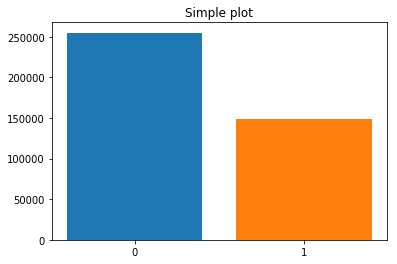

In [379]:
fig, ax = plt.subplots()
ax.bar('0', duplicate_group[0])
ax.bar('1', duplicate_group[1])
ax.set_title('Simple plot')
plt.show()

In [330]:
questions = pd.concat([df_train['question1'], df_train['question2']], axis=0)
questions.shape

(808580,)

In [235]:
# questions_ordered = {}

# index=0
# for i in range(0, 1000):
#     questions_ordered[index] = df_train.iloc[i]['question1']
#     questions_ordered[index+1] = df_train.iloc[i]['question2']
#     index+=2
# len(questions_ordered)

In [236]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import nltk.stem

# english_stemmer = nltk.stem.SnowballStemmer('english')
# class StemmedTfidfVectorizer(TfidfVectorizer):
#     def build_analyzer(self):
#         analyzer = super(TfidfVectorizer, self).build_analyzer()
#         return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [143]:
vectorizer = StemmedTfidfVectorizer(min_df=1, 
                                    stop_words='english', 
                                    decode_error='ignore')
X_train = vectorizer.fit_transform(questions[:10000].values)
num_samples, num_features = X_train.shape
print("samples: %d, features: %d" % (num_samples, num_features))

samples: 10000, features: 8641


In [144]:
from sklearn.metrics.pairwise import euclidean_distances

for i in range(0, num_samples, 2):
    dist = euclidean_distances( X_train.getrow(i),  X_train.getrow(i+1))
    print(f'questions {i} : {i+1}, dist: {dist}')

questions 0 : 1, dist: [[1.41421356]]
questions 2 : 3, dist: [[1.41421356]]
questions 4 : 5, dist: [[1.41421356]]
questions 6 : 7, dist: [[1.41421356]]
questions 8 : 9, dist: [[1.41421356]]
questions 10 : 11, dist: [[1.41421356]]
questions 12 : 13, dist: [[1.41421356]]
questions 14 : 15, dist: [[1.27831964]]
questions 16 : 17, dist: [[1.41421356]]
questions 18 : 19, dist: [[1.41421356]]
questions 20 : 21, dist: [[1.41421356]]
questions 22 : 23, dist: [[1.41421356]]
questions 24 : 25, dist: [[1.41421356]]
questions 26 : 27, dist: [[1.41421356]]
questions 28 : 29, dist: [[1.41421356]]
questions 30 : 31, dist: [[1.41421356]]
questions 32 : 33, dist: [[1.41421356]]
questions 34 : 35, dist: [[1.41421356]]
questions 36 : 37, dist: [[1.41421356]]
questions 38 : 39, dist: [[1.41421356]]
questions 40 : 41, dist: [[1.41421356]]
questions 42 : 43, dist: [[1.41421356]]
questions 44 : 45, dist: [[1.41421356]]
questions 46 : 47, dist: [[1.41421356]]
questions 48 : 49, dist: [[1.27138351]]
questions 

questions 560 : 561, dist: [[1.41421356]]
questions 562 : 563, dist: [[1.41421356]]
questions 564 : 565, dist: [[1.41421356]]
questions 566 : 567, dist: [[1.33732678]]
questions 568 : 569, dist: [[1.19746612]]
questions 570 : 571, dist: [[1.41421356]]
questions 572 : 573, dist: [[1.41421356]]
questions 574 : 575, dist: [[1.41421356]]
questions 576 : 577, dist: [[1.41421356]]
questions 578 : 579, dist: [[1.41421356]]
questions 580 : 581, dist: [[1.41421356]]
questions 582 : 583, dist: [[1.41421356]]
questions 584 : 585, dist: [[1.41421356]]
questions 586 : 587, dist: [[1.41421356]]
questions 588 : 589, dist: [[1.41421356]]
questions 590 : 591, dist: [[1.41421356]]
questions 592 : 593, dist: [[1.41421356]]
questions 594 : 595, dist: [[1.41421356]]
questions 596 : 597, dist: [[1.41421356]]
questions 598 : 599, dist: [[1.41421356]]
questions 600 : 601, dist: [[1.41421356]]
questions 602 : 603, dist: [[1.41421356]]
questions 604 : 605, dist: [[1.41421356]]
questions 606 : 607, dist: [[1.414

questions 1150 : 1151, dist: [[1.41421356]]
questions 1152 : 1153, dist: [[1.41421356]]
questions 1154 : 1155, dist: [[1.41421356]]
questions 1156 : 1157, dist: [[1.41421356]]
questions 1158 : 1159, dist: [[1.41421356]]
questions 1160 : 1161, dist: [[1.41421356]]
questions 1162 : 1163, dist: [[1.41421356]]
questions 1164 : 1165, dist: [[1.41421356]]
questions 1166 : 1167, dist: [[1.41421356]]
questions 1168 : 1169, dist: [[1.41421356]]
questions 1170 : 1171, dist: [[1.41421356]]
questions 1172 : 1173, dist: [[1.41421356]]
questions 1174 : 1175, dist: [[1.41421356]]
questions 1176 : 1177, dist: [[1.41421356]]
questions 1178 : 1179, dist: [[1.41421356]]
questions 1180 : 1181, dist: [[1.41421356]]
questions 1182 : 1183, dist: [[1.41421356]]
questions 1184 : 1185, dist: [[1.41421356]]
questions 1186 : 1187, dist: [[1.41421356]]
questions 1188 : 1189, dist: [[1.41421356]]
questions 1190 : 1191, dist: [[1.41421356]]
questions 1192 : 1193, dist: [[1.41421356]]
questions 1194 : 1195, dist: [[1

questions 1734 : 1735, dist: [[1.41421356]]
questions 1736 : 1737, dist: [[1.41421356]]
questions 1738 : 1739, dist: [[1.41421356]]
questions 1740 : 1741, dist: [[1.41421356]]
questions 1742 : 1743, dist: [[1.41421356]]
questions 1744 : 1745, dist: [[1.41421356]]
questions 1746 : 1747, dist: [[1.41421356]]
questions 1748 : 1749, dist: [[1.41421356]]
questions 1750 : 1751, dist: [[1.41421356]]
questions 1752 : 1753, dist: [[1.41421356]]
questions 1754 : 1755, dist: [[1.41421356]]
questions 1756 : 1757, dist: [[1.41421356]]
questions 1758 : 1759, dist: [[1.41421356]]
questions 1760 : 1761, dist: [[1.41421356]]
questions 1762 : 1763, dist: [[1.41421356]]
questions 1764 : 1765, dist: [[1.41421356]]
questions 1766 : 1767, dist: [[1.41421356]]
questions 1768 : 1769, dist: [[1.41421356]]
questions 1770 : 1771, dist: [[1.41421356]]
questions 1772 : 1773, dist: [[1.41421356]]
questions 1774 : 1775, dist: [[1.41421356]]
questions 1776 : 1777, dist: [[1.41421356]]
questions 1778 : 1779, dist: [[1

questions 2234 : 2235, dist: [[1.41421356]]
questions 2236 : 2237, dist: [[1.41421356]]
questions 2238 : 2239, dist: [[1.27726155]]
questions 2240 : 2241, dist: [[1.41421356]]
questions 2242 : 2243, dist: [[1.41421356]]
questions 2244 : 2245, dist: [[1.41421356]]
questions 2246 : 2247, dist: [[1.41421356]]
questions 2248 : 2249, dist: [[1.41421356]]
questions 2250 : 2251, dist: [[1.41421356]]
questions 2252 : 2253, dist: [[1.41421356]]
questions 2254 : 2255, dist: [[1.41421356]]
questions 2256 : 2257, dist: [[1.41421356]]
questions 2258 : 2259, dist: [[1.41421356]]
questions 2260 : 2261, dist: [[1.41421356]]
questions 2262 : 2263, dist: [[1.41421356]]
questions 2264 : 2265, dist: [[1.41421356]]
questions 2266 : 2267, dist: [[1.41421356]]
questions 2268 : 2269, dist: [[1.41421356]]
questions 2270 : 2271, dist: [[1.41421356]]
questions 2272 : 2273, dist: [[1.41421356]]
questions 2274 : 2275, dist: [[1.41421356]]
questions 2276 : 2277, dist: [[1.41421356]]
questions 2278 : 2279, dist: [[1

questions 2796 : 2797, dist: [[1.41421356]]
questions 2798 : 2799, dist: [[1.41421356]]
questions 2800 : 2801, dist: [[1.41421356]]
questions 2802 : 2803, dist: [[1.41421356]]
questions 2804 : 2805, dist: [[1.41421356]]
questions 2806 : 2807, dist: [[1.41421356]]
questions 2808 : 2809, dist: [[1.41421356]]
questions 2810 : 2811, dist: [[1.41421356]]
questions 2812 : 2813, dist: [[1.41421356]]
questions 2814 : 2815, dist: [[1.41421356]]
questions 2816 : 2817, dist: [[1.41421356]]
questions 2818 : 2819, dist: [[1.41421356]]
questions 2820 : 2821, dist: [[1.41421356]]
questions 2822 : 2823, dist: [[1.41421356]]
questions 2824 : 2825, dist: [[1.41421356]]
questions 2826 : 2827, dist: [[1.41421356]]
questions 2828 : 2829, dist: [[1.41421356]]
questions 2830 : 2831, dist: [[1.41421356]]
questions 2832 : 2833, dist: [[1.41421356]]
questions 2834 : 2835, dist: [[1.41421356]]
questions 2836 : 2837, dist: [[1.30337597]]
questions 2838 : 2839, dist: [[1.41421356]]
questions 2840 : 2841, dist: [[1

questions 3372 : 3373, dist: [[1.41421356]]
questions 3374 : 3375, dist: [[1.41421356]]
questions 3376 : 3377, dist: [[1.41421356]]
questions 3378 : 3379, dist: [[1.41421356]]
questions 3380 : 3381, dist: [[1.41421356]]
questions 3382 : 3383, dist: [[1.41421356]]
questions 3384 : 3385, dist: [[1.41421356]]
questions 3386 : 3387, dist: [[1.41421356]]
questions 3388 : 3389, dist: [[1.41421356]]
questions 3390 : 3391, dist: [[1.41421356]]
questions 3392 : 3393, dist: [[1.41421356]]
questions 3394 : 3395, dist: [[1.41421356]]
questions 3396 : 3397, dist: [[1.41421356]]
questions 3398 : 3399, dist: [[1.41421356]]
questions 3400 : 3401, dist: [[1.41421356]]
questions 3402 : 3403, dist: [[1.41421356]]
questions 3404 : 3405, dist: [[1.41421356]]
questions 3406 : 3407, dist: [[1.41421356]]
questions 3408 : 3409, dist: [[1.41421356]]
questions 3410 : 3411, dist: [[1.41421356]]
questions 3412 : 3413, dist: [[1.41421356]]
questions 3414 : 3415, dist: [[1.41421356]]
questions 3416 : 3417, dist: [[1

questions 3930 : 3931, dist: [[1.41421356]]
questions 3932 : 3933, dist: [[1.41421356]]
questions 3934 : 3935, dist: [[1.41421356]]
questions 3936 : 3937, dist: [[1.41421356]]
questions 3938 : 3939, dist: [[1.41421356]]
questions 3940 : 3941, dist: [[1.41421356]]
questions 3942 : 3943, dist: [[1.41421356]]
questions 3944 : 3945, dist: [[1.41421356]]
questions 3946 : 3947, dist: [[1.41421356]]
questions 3948 : 3949, dist: [[1.41421356]]
questions 3950 : 3951, dist: [[1.41421356]]
questions 3952 : 3953, dist: [[1.41421356]]
questions 3954 : 3955, dist: [[1.41421356]]
questions 3956 : 3957, dist: [[1.41421356]]
questions 3958 : 3959, dist: [[1.41421356]]
questions 3960 : 3961, dist: [[1.41421356]]
questions 3962 : 3963, dist: [[1.41421356]]
questions 3964 : 3965, dist: [[1.41421356]]
questions 3966 : 3967, dist: [[1.41421356]]
questions 3968 : 3969, dist: [[1.41421356]]
questions 3970 : 3971, dist: [[1.41421356]]
questions 3972 : 3973, dist: [[1.41421356]]
questions 3974 : 3975, dist: [[1

questions 4468 : 4469, dist: [[1.41421356]]
questions 4470 : 4471, dist: [[1.41421356]]
questions 4472 : 4473, dist: [[1.41421356]]
questions 4474 : 4475, dist: [[1.41421356]]
questions 4476 : 4477, dist: [[1.41421356]]
questions 4478 : 4479, dist: [[1.41421356]]
questions 4480 : 4481, dist: [[1.41421356]]
questions 4482 : 4483, dist: [[1.41421356]]
questions 4484 : 4485, dist: [[1.41421356]]
questions 4486 : 4487, dist: [[1.41421356]]
questions 4488 : 4489, dist: [[1.41421356]]
questions 4490 : 4491, dist: [[1.41421356]]
questions 4492 : 4493, dist: [[1.41421356]]
questions 4494 : 4495, dist: [[1.41421356]]
questions 4496 : 4497, dist: [[1.41421356]]
questions 4498 : 4499, dist: [[1.41421356]]
questions 4500 : 4501, dist: [[1.41421356]]
questions 4502 : 4503, dist: [[1.41421356]]
questions 4504 : 4505, dist: [[1.41421356]]
questions 4506 : 4507, dist: [[1.41421356]]
questions 4508 : 4509, dist: [[1.41421356]]
questions 4510 : 4511, dist: [[1.41421356]]
questions 4512 : 4513, dist: [[1

questions 5014 : 5015, dist: [[1.41421356]]
questions 5016 : 5017, dist: [[1.41421356]]
questions 5018 : 5019, dist: [[1.41421356]]
questions 5020 : 5021, dist: [[1.41421356]]
questions 5022 : 5023, dist: [[1.41421356]]
questions 5024 : 5025, dist: [[1.41421356]]
questions 5026 : 5027, dist: [[1.41421356]]
questions 5028 : 5029, dist: [[1.41421356]]
questions 5030 : 5031, dist: [[1.41421356]]
questions 5032 : 5033, dist: [[1.41421356]]
questions 5034 : 5035, dist: [[1.41421356]]
questions 5036 : 5037, dist: [[1.41421356]]
questions 5038 : 5039, dist: [[1.41421356]]
questions 5040 : 5041, dist: [[1.41421356]]
questions 5042 : 5043, dist: [[1.41421356]]
questions 5044 : 5045, dist: [[1.41421356]]
questions 5046 : 5047, dist: [[1.41421356]]
questions 5048 : 5049, dist: [[1.41421356]]
questions 5050 : 5051, dist: [[1.41421356]]
questions 5052 : 5053, dist: [[1.41421356]]
questions 5054 : 5055, dist: [[1.41421356]]
questions 5056 : 5057, dist: [[1.41421356]]
questions 5058 : 5059, dist: [[1

questions 5608 : 5609, dist: [[1.41421356]]
questions 5610 : 5611, dist: [[1.41421356]]
questions 5612 : 5613, dist: [[1.41421356]]
questions 5614 : 5615, dist: [[1.41421356]]
questions 5616 : 5617, dist: [[1.28803995]]
questions 5618 : 5619, dist: [[1.41421356]]
questions 5620 : 5621, dist: [[1.41421356]]
questions 5622 : 5623, dist: [[1.41421356]]
questions 5624 : 5625, dist: [[1.41421356]]
questions 5626 : 5627, dist: [[1.41421356]]
questions 5628 : 5629, dist: [[1.41421356]]
questions 5630 : 5631, dist: [[1.41421356]]
questions 5632 : 5633, dist: [[1.41421356]]
questions 5634 : 5635, dist: [[1.41421356]]
questions 5636 : 5637, dist: [[1.41421356]]
questions 5638 : 5639, dist: [[1.41421356]]
questions 5640 : 5641, dist: [[1.41421356]]
questions 5642 : 5643, dist: [[1.41421356]]
questions 5644 : 5645, dist: [[1.41421356]]
questions 5646 : 5647, dist: [[1.41421356]]
questions 5648 : 5649, dist: [[1.41421356]]
questions 5650 : 5651, dist: [[1.41421356]]
questions 5652 : 5653, dist: [[1

questions 6124 : 6125, dist: [[1.41421356]]
questions 6126 : 6127, dist: [[1.41421356]]
questions 6128 : 6129, dist: [[1.41421356]]
questions 6130 : 6131, dist: [[1.41421356]]
questions 6132 : 6133, dist: [[1.41421356]]
questions 6134 : 6135, dist: [[1.41421356]]
questions 6136 : 6137, dist: [[1.41421356]]
questions 6138 : 6139, dist: [[1.41421356]]
questions 6140 : 6141, dist: [[1.41421356]]
questions 6142 : 6143, dist: [[1.41421356]]
questions 6144 : 6145, dist: [[1.41421356]]
questions 6146 : 6147, dist: [[1.41421356]]
questions 6148 : 6149, dist: [[1.41421356]]
questions 6150 : 6151, dist: [[1.41421356]]
questions 6152 : 6153, dist: [[1.41421356]]
questions 6154 : 6155, dist: [[1.41421356]]
questions 6156 : 6157, dist: [[1.41421356]]
questions 6158 : 6159, dist: [[1.41421356]]
questions 6160 : 6161, dist: [[1.41421356]]
questions 6162 : 6163, dist: [[1.41421356]]
questions 6164 : 6165, dist: [[1.41421356]]
questions 6166 : 6167, dist: [[1.41421356]]
questions 6168 : 6169, dist: [[1

questions 6646 : 6647, dist: [[1.41421356]]
questions 6648 : 6649, dist: [[1.41421356]]
questions 6650 : 6651, dist: [[1.41421356]]
questions 6652 : 6653, dist: [[1.41421356]]
questions 6654 : 6655, dist: [[1.41421356]]
questions 6656 : 6657, dist: [[1.41421356]]
questions 6658 : 6659, dist: [[1.41421356]]
questions 6660 : 6661, dist: [[1.41421356]]
questions 6662 : 6663, dist: [[1.41421356]]
questions 6664 : 6665, dist: [[1.41421356]]
questions 6666 : 6667, dist: [[1.41421356]]
questions 6668 : 6669, dist: [[1.41421356]]
questions 6670 : 6671, dist: [[1.41421356]]
questions 6672 : 6673, dist: [[1.41421356]]
questions 6674 : 6675, dist: [[1.41421356]]
questions 6676 : 6677, dist: [[1.41421356]]
questions 6678 : 6679, dist: [[1.41421356]]
questions 6680 : 6681, dist: [[1.41421356]]
questions 6682 : 6683, dist: [[1.41421356]]
questions 6684 : 6685, dist: [[1.41421356]]
questions 6686 : 6687, dist: [[1.41421356]]
questions 6688 : 6689, dist: [[1.41421356]]
questions 6690 : 6691, dist: [[1

questions 7192 : 7193, dist: [[1.41421356]]
questions 7194 : 7195, dist: [[1.41421356]]
questions 7196 : 7197, dist: [[1.41421356]]
questions 7198 : 7199, dist: [[1.41421356]]
questions 7200 : 7201, dist: [[1.41421356]]
questions 7202 : 7203, dist: [[1.41421356]]
questions 7204 : 7205, dist: [[1.41421356]]
questions 7206 : 7207, dist: [[1.41421356]]
questions 7208 : 7209, dist: [[1.41421356]]
questions 7210 : 7211, dist: [[1.41421356]]
questions 7212 : 7213, dist: [[1.41421356]]
questions 7214 : 7215, dist: [[1.41421356]]
questions 7216 : 7217, dist: [[1.3846064]]
questions 7218 : 7219, dist: [[1.41421356]]
questions 7220 : 7221, dist: [[1.41421356]]
questions 7222 : 7223, dist: [[1.41421356]]
questions 7224 : 7225, dist: [[1.41421356]]
questions 7226 : 7227, dist: [[1.41421356]]
questions 7228 : 7229, dist: [[1.41421356]]
questions 7230 : 7231, dist: [[1.41421356]]
questions 7232 : 7233, dist: [[1.41421356]]
questions 7234 : 7235, dist: [[1.41421356]]
questions 7236 : 7237, dist: [[1.

questions 7736 : 7737, dist: [[1.41421356]]
questions 7738 : 7739, dist: [[1.41421356]]
questions 7740 : 7741, dist: [[1.41421356]]
questions 7742 : 7743, dist: [[1.41421356]]
questions 7744 : 7745, dist: [[1.41421356]]
questions 7746 : 7747, dist: [[1.41421356]]
questions 7748 : 7749, dist: [[1.41421356]]
questions 7750 : 7751, dist: [[1.41421356]]
questions 7752 : 7753, dist: [[1.41421356]]
questions 7754 : 7755, dist: [[1.41421356]]
questions 7756 : 7757, dist: [[1.41421356]]
questions 7758 : 7759, dist: [[1.41421356]]
questions 7760 : 7761, dist: [[1.41421356]]
questions 7762 : 7763, dist: [[1.41421356]]
questions 7764 : 7765, dist: [[1.41421356]]
questions 7766 : 7767, dist: [[1.41421356]]
questions 7768 : 7769, dist: [[1.41421356]]
questions 7770 : 7771, dist: [[1.41421356]]
questions 7772 : 7773, dist: [[1.41421356]]
questions 7774 : 7775, dist: [[1.41421356]]
questions 7776 : 7777, dist: [[1.41421356]]
questions 7778 : 7779, dist: [[1.22223448]]
questions 7780 : 7781, dist: [[1

questions 8290 : 8291, dist: [[1.41421356]]
questions 8292 : 8293, dist: [[1.41421356]]
questions 8294 : 8295, dist: [[1.41421356]]
questions 8296 : 8297, dist: [[1.41421356]]
questions 8298 : 8299, dist: [[1.41421356]]
questions 8300 : 8301, dist: [[1.41421356]]
questions 8302 : 8303, dist: [[1.41421356]]
questions 8304 : 8305, dist: [[1.41421356]]
questions 8306 : 8307, dist: [[1.41421356]]
questions 8308 : 8309, dist: [[1.41421356]]
questions 8310 : 8311, dist: [[1.41421356]]
questions 8312 : 8313, dist: [[1.41421356]]
questions 8314 : 8315, dist: [[1.41421356]]
questions 8316 : 8317, dist: [[1.41421356]]
questions 8318 : 8319, dist: [[1.41421356]]
questions 8320 : 8321, dist: [[1.41421356]]
questions 8322 : 8323, dist: [[1.41421356]]
questions 8324 : 8325, dist: [[1.41421356]]
questions 8326 : 8327, dist: [[1.41421356]]
questions 8328 : 8329, dist: [[1.41421356]]
questions 8330 : 8331, dist: [[1.41421356]]
questions 8332 : 8333, dist: [[1.41421356]]
questions 8334 : 8335, dist: [[1

questions 8834 : 8835, dist: [[1.41421356]]
questions 8836 : 8837, dist: [[1.41421356]]
questions 8838 : 8839, dist: [[1.41421356]]
questions 8840 : 8841, dist: [[1.41421356]]
questions 8842 : 8843, dist: [[1.41421356]]
questions 8844 : 8845, dist: [[1.41421356]]
questions 8846 : 8847, dist: [[1.41421356]]
questions 8848 : 8849, dist: [[1.41421356]]
questions 8850 : 8851, dist: [[1.41421356]]
questions 8852 : 8853, dist: [[1.41421356]]
questions 8854 : 8855, dist: [[1.41421356]]
questions 8856 : 8857, dist: [[1.41421356]]
questions 8858 : 8859, dist: [[1.41421356]]
questions 8860 : 8861, dist: [[1.41421356]]
questions 8862 : 8863, dist: [[1.41421356]]
questions 8864 : 8865, dist: [[1.41421356]]
questions 8866 : 8867, dist: [[1.41421356]]
questions 8868 : 8869, dist: [[1.37505331]]
questions 8870 : 8871, dist: [[1.41421356]]
questions 8872 : 8873, dist: [[1.41421356]]
questions 8874 : 8875, dist: [[1.41421356]]
questions 8876 : 8877, dist: [[1.41421356]]
questions 8878 : 8879, dist: [[1

questions 9378 : 9379, dist: [[1.41421356]]
questions 9380 : 9381, dist: [[1.41421356]]
questions 9382 : 9383, dist: [[1.41421356]]
questions 9384 : 9385, dist: [[1.41421356]]
questions 9386 : 9387, dist: [[1.41421356]]
questions 9388 : 9389, dist: [[1.41421356]]
questions 9390 : 9391, dist: [[1.41421356]]
questions 9392 : 9393, dist: [[1.41421356]]
questions 9394 : 9395, dist: [[1.41421356]]
questions 9396 : 9397, dist: [[1.41421356]]
questions 9398 : 9399, dist: [[1.41421356]]
questions 9400 : 9401, dist: [[1.41421356]]
questions 9402 : 9403, dist: [[1.41421356]]
questions 9404 : 9405, dist: [[1.41421356]]
questions 9406 : 9407, dist: [[1.41421356]]
questions 9408 : 9409, dist: [[1.41421356]]
questions 9410 : 9411, dist: [[1.41421356]]
questions 9412 : 9413, dist: [[1.41421356]]
questions 9414 : 9415, dist: [[1.41421356]]
questions 9416 : 9417, dist: [[1.41421356]]
questions 9418 : 9419, dist: [[1.41421356]]
questions 9420 : 9421, dist: [[1.41421356]]
questions 9422 : 9423, dist: [[1

questions 9910 : 9911, dist: [[1.41421356]]
questions 9912 : 9913, dist: [[1.41421356]]
questions 9914 : 9915, dist: [[1.41421356]]
questions 9916 : 9917, dist: [[1.41421356]]
questions 9918 : 9919, dist: [[1.41421356]]
questions 9920 : 9921, dist: [[1.37451242]]
questions 9922 : 9923, dist: [[1.41421356]]
questions 9924 : 9925, dist: [[1.41421356]]
questions 9926 : 9927, dist: [[1.41421356]]
questions 9928 : 9929, dist: [[1.41421356]]
questions 9930 : 9931, dist: [[1.41421356]]
questions 9932 : 9933, dist: [[1.41421356]]
questions 9934 : 9935, dist: [[1.41421356]]
questions 9936 : 9937, dist: [[1.41421356]]
questions 9938 : 9939, dist: [[1.41421356]]
questions 9940 : 9941, dist: [[1.41421356]]
questions 9942 : 9943, dist: [[1.41421356]]
questions 9944 : 9945, dist: [[1.41421356]]
questions 9946 : 9947, dist: [[1.41421356]]
questions 9948 : 9949, dist: [[1.41421356]]
questions 9950 : 9951, dist: [[1.41421356]]
questions 9952 : 9953, dist: [[1.41421356]]
questions 9954 : 9955, dist: [[1

### Visualização exploratória
Nesta seção, você precisará fornecer alguma forma de visualização que sintetize ou evidencie uma característica ou atributo relevante sobre os dados. A visualização deve sustentar adequadamente os dados utilizados. Discuta por que essa visualização foi escolhida e por que é relevante. Questões para se perguntar ao escrever esta seção:
- _Você visualizou uma característica ou um atributo relevante acerca do conjunto de dados ou dados de entrada?_
- _A visualização foi completamente analisada e discutida?_
- _Se um gráfico foi fornecido, os eixos, títulos e dados foram claramente definidos?_

### Algoritmos e técnicas
Nesta seção, você deverá discutir os algoritmos e técnicas que você pretende utilizar para solucionar o problema. Você deverá justificar o uso de cada algoritmo ou técnica baseado nas características do problema e domínio do problema. Questões para se perguntar ao escrever esta seção:
- _Os algoritmos que serão utilizados, incluindo quaisquer variáveis/parâmetros padrão do projeto, foram claramente definidos?_
- _As técnicas a serem usadas foram adequadamente discutidas e justificadas?_
- _Ficou claro como os dados de entrada ou conjuntos de dados serão controlados pelos algoritmos e técnicas escolhidas?_

### Benchmark
Nesta  seção, você deverá definir claramente um resultado de referência (benchmark) ou limiar para comparar entre desempenhos obtidos pela sua solução. O raciocínio por trás da referência (no caso onde não é estabelecido um resultado) deve ser discutido. Questões para se perguntar ao escrever esta seção:
- _Algum resultado ou valor que funcione como referência para a medida de desempenho foi fornecido?_
- _Ficou claro como esse resultado ou valor foi obtido (seja por dados ou por hipóteses)?_

## III. Metodologia
_(aprox. 3-5 páginas)_

### Pré-processamento de dados
Nesta seção, você deve documentar claramente todos os passos de pré-processamento que você pretende fazer, caso algum seja necessário. A partir da seção anterior, quaisquer anormalidades ou características que você identificou no conjunto de dados deverão ser adequadamente direcionadas e tratadas aqui. Questões para se perguntar ao escrever esta seção:
- _Se os algoritmos escolhidos requerem passos de pré-processamento, como seleção ou transformações de atributos, tais passos foram adequadamente documentados?_
- _Baseado na seção de **Exploração de dados**, se existiram anormalidade ou características que precisem ser tratadas, elas foram adequadamente corrigidas?_
- _Se não é necessário um pré-processamento, foi bem definido o porquê?_

### Implementação
Nesta seção, o processo de escolha de quais métricas, algoritmos e técnicas deveriam ser implementados para os dados apresentados deve estar claramente documentado. Deve estar bastante claro como a implementação foi feita, e uma discussão deve ser elaborada a respeito de quaisquer complicações ocorridas durante o processo.  Questões para se perguntar ao escrever esta seção:
- _Ficou claro como os algoritmos e técnicas foram implementados com os conjuntos de dados e os dados de entrada apresentados?_
- _Houve complicações com as métricas ou técnicas originais que acabaram exigindo mudanças antes de chegar à solução?_
- _Houve qualquer parte do processo de codificação (escrita de funções complicadas, por exemplo) que deveriam ser documentadas?_

### Refinamento
Nesta seção, você deverá discutir o processo de aperfeiçoamento dos algoritmos e técnicas usados em sua implementação. Por exemplo, ajuste de parâmetros para que certos modelos obtenham melhores soluções está dentro da categoria de refinamento. Suas soluções inicial e final devem ser registradas, bem como quaisquer outros resultados intermediários significativos, conforme o necessário. Questões para se perguntar ao escrever esta seção:
- _Uma solução inicial foi encontrada e claramente reportada?_
- _O processo de melhoria foi documentado de foma clara, bem como as técnicas utilizadas?_
- _As soluções intermediárias e finais foram reportadas claramente, conforme o processo foi sendo melhorado?_

## IV. Resultados
_(aprox. 2-3 páginas)_

### Modelo de avaliação e validação
Nesta seção, o modelo final e quaisquer qualidades que o sustentem devem ser avaliadas em detalhe. Deve ficar claro como o modelo final foi obtido e por que tal modelo foi escolhido. Além disso, algum tipo de análise deve ser realizada para validar a robustez do modelo e sua solução, como, por exemplo, manipular os dados de entrada ou o ambiente para ver como a solução do modelo é afetada (técnica chamada de análise sensitiva). Questões para se perguntar ao escrever esta seção:
- _O modelo final é razoável e alinhado com as expectativas de solução? Os parâmetros finais do modelo são apropriados?_
- _O modelo final foi testado com várias entradas para avaliar se o modelo generaliza bem com dados não vistos?_
-_O modelo é robusto o suficiente para o problema? Pequenas perturbações (mudanças) nos dados de treinamento ou no espaço de entrada afetam os resultados de forma considerável?_
- _Os resultados obtidos do modelo são confiáveis?_

### Justificativa
Nesta seção, a solução final do seu modelo e os resultados dela obtidos devem ser comparados aos valores de referência (benchmark) que você estabeleceu anteriormente no projeto, usando algum tipo de análise estatística. Você deverá também justificar se esses resultados e a solução são significativas o suficiente para ter resolvido o problema apresentado no projeto. Questões para se perguntar ao escrever esta seção:
- _Os resultados finais encontrados são mais fortes do que a referência reportada anteriormente?_
- _Você analisou e discutiu totalmente a solução final?_
- _A solução final é significativa o suficiente para ter resolvido o problema?_

## V. Conclusão
_(aprox. 1-2 páginas)_

### Foma livre de visualização
Nesta seção, você deverá fornecer alguma forma de visualização que enfatize uma qualidade importante do projeto. A visualização é de forma livre, mas deve sustentar de forma razoável um resultado ou característica relevante sobre o problema que você quer discutir. Questões para se perguntar ao escrever esta seção:
- _Você visualizou uma qualidade importante ou relevante acerca do problema, conjunto de dados, dados de entrada, ou resultados?_
- _A visualização foi completamente analisada e discutida?_
- _Se um gráfico foi fornecido, os eixos, títulos e dados foram claramente definidos?_

### Reflexão
Nesta seção, você deverá resumir os procedimentos desde o problema até a solução e discutir um ou dois aspectos  do projeto que você achou particularmente interessante ou difícil. É esperado que você reflita sobre o projeto como um todo de forma a mostrar que você possui um entendimento sólido de todo o processo empregado em seu trabalho. Questões para se perguntar ao escrever esta seção:
- _Você resumiu inteiramente o processo que você utilizou neste projeto?_
- _Houve algum aspecto interessante do projeto?_
- _Houve algum aspecto difícil do projeto?_
- _O modelo e solução final alinham-se com suas expectativas para o problema, e devem ser usadas de forma geral para resolver esses tipos de problemas?_

### Melhorias
Nesta seção, você deverá discutir como um aspecto da sua implementação poderia ser melhorado. Por exemplo, considere maneiras de tornar a sua implementação mais geral e o que precisaria ser modificado. Você não precisa fazer a melhoria, mas as possíveis soluções que resultariam de tais mudanças devem ser consideradas e comparadas/contrastadas com a sua solução atual. Questões para se perguntar ao escrever esta seção:
- _Existem melhorias futuras que podem ser feitas nos algoritmos ou técnicas que você usou neste projeto?_
- _Existem algoritmos ou técnicas que você pesquisou, porém não soube como implementá-las, mas consideraria usar se você soubesse como?_
- _Se você usou sua solução final como nova referência, você acredita existir uma solução ainda melhor?_

-----------

**Antes de enviar, pergunte-se. . .**

- _O relatório de projeto que você escreveu segue uma estrutura bem organizada, similar ao modelo do projeto?_
- Cada seção (particularmente **Análise** e **Metodologia**) foi escrita de maneira clara, concisa e específica? Existe algum termo ou frase ambígua que precise de esclarecimento?
- O público-alvo do seu projeto será capaz de entender suas análises, métodos e resultados?
- Você revisou seu relatório de projeto adequadamente, de forma a minimizar a quantidade de erros gramaticais e ortográficos?
- Todos os recursos usados neste projeto foram corretamente citados e referenciados?
- O código que implementa sua solução está legível e comentado adequadamente?
- O código é executado sem erros e produz resultados similares àqueles reportados?

In [214]:
y = list(c.values())

In [215]:
type(y)

list

In [216]:
y[:4]

[1, 4, 1, 1]

In [217]:
x = 

In [219]:
np.sum(np.array(list(c.values())))

6446